In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

In [3]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print(train.shape)
print(train.info())

(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [5]:
train['Transported'] = train['Transported'].astype('int')

## Data Cleaning

In [6]:
# Get categorical columns
categorical_columns = [var for var in train.columns if train[var].dtype=='O']
print(categorical_columns)

# Get numerical columns
numerical_columns = [var for var in train.columns if train[var].dtype!='O' and var != 'Transported']
print(numerical_columns)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [7]:
# Check null data 
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer, KNNImputer

In [10]:
# fill null numerical data with mean 
nume_impute = SimpleImputer(missing_values= np.nan, strategy='mean')

# fill null categorical data with most frequent (mode) 
cate_impute = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

In [11]:
for col in categorical_columns:
    train[col] = cate_impute.fit_transform(train[[col]])
    test[col] = cate_impute.fit_transform(test[[col]])
for col in numerical_columns:
    train[col] = nume_impute.fit_transform(train[[col]])
    test[col] = nume_impute.fit_transform(test[[col]])

In [12]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [13]:
train.duplicated().sum()

0

In [14]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


### Feature Extraction

In [15]:
train['Deck'] = train['Cabin'].apply(lambda x: str(x).split('/')[0])
train['Number'] = train['Cabin'].apply(lambda x: str(x).split('/')[1]).astype('int')
train['Size'] = train['Cabin'].apply(lambda x: str(x).split('/')[2])

test['Deck'] = test['Cabin'].apply(lambda x: str(x).split('/')[0])
test['Number'] = test['Cabin'].apply(lambda x: str(x).split('/')[1]).astype('int')
test['Size'] = test['Cabin'].apply(lambda x: str(x).split('/')[2])

In [16]:
categorical_columns.append('Deck')
categorical_columns.append('Size')
categorical_columns.remove('Cabin')
categorical_columns.remove('PassengerId')
numerical_columns.append('Number')

In [17]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Number,Size
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [18]:
train.drop('Cabin', axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)
train.drop('Name', axis = 1, inplace = True)

test.drop('Name', axis = 1, inplace = True)
test.drop('Cabin', axis=1, inplace=True)

In [19]:
train.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Size
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [20]:
train.describe(include='O')

,HomePlanet,CryoSleep,Destination,VIP,Deck,Size
count,8693,8693,8693,8693,8693,8693
unique,3,2,3,2,8,2
top,Earth,False,TRAPPIST-1e,False,F,S
freq,4803,5656,6097,8494,2794,4487


In [21]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Number
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.00000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,603.42678
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016,506.36841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,173.00000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,448.00000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,983.00000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1894.00000


## Data visualization

In [22]:
print(categorical_columns)
print(numerical_columns)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Deck', 'Size']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Number']


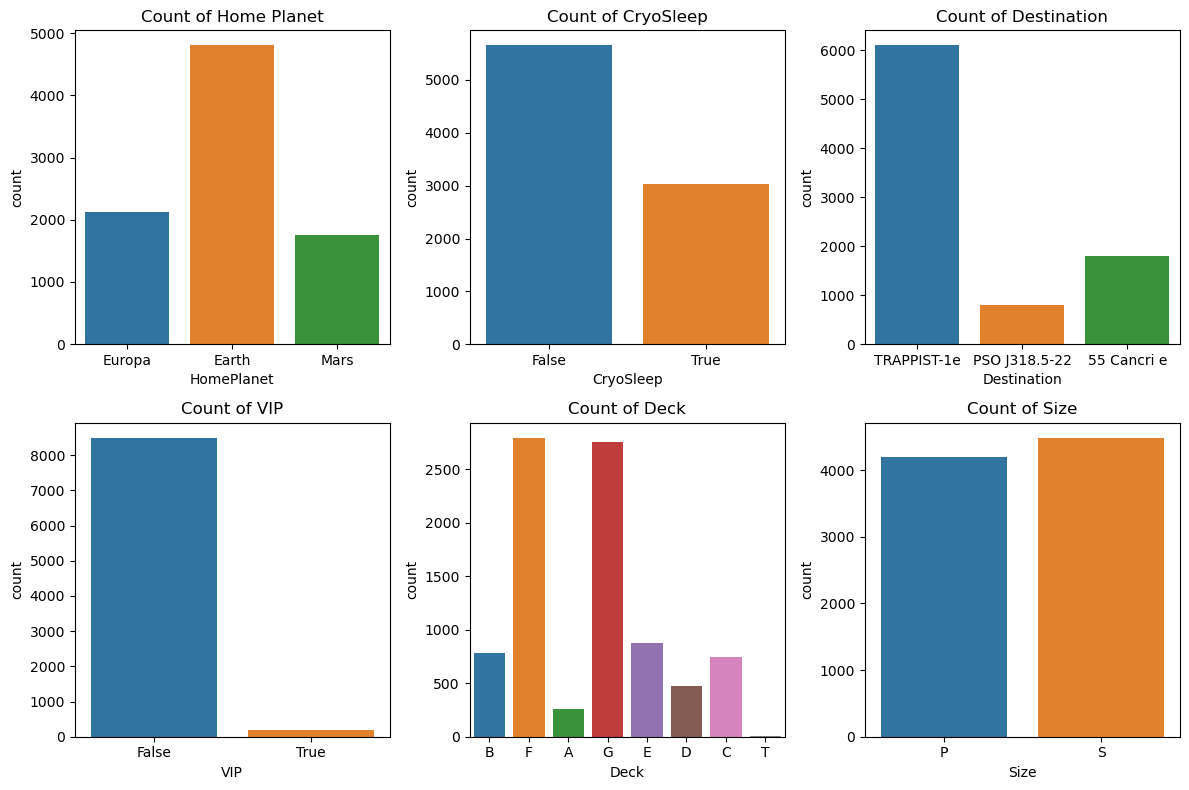

In [23]:
# Bar plot Home Planet
fig, axes = plt.subplots(2, 3, figsize=(12,8))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
sns.countplot(data = train, x = 'HomePlanet',ax = ax1)
ax1.set_title('Count of Home Planet')
sns.countplot(data = train, x = 'CryoSleep',ax = ax2)
ax2.set_title('Count of CryoSleep')
sns.countplot(data = train, x = 'Destination',ax = ax3)
ax3.set_title('Count of Destination')
sns.countplot(data = train, x = 'VIP',ax = ax4)
ax4.set_title('Count of VIP')
sns.countplot(data = train, x = 'Deck',ax = ax5)
ax5.set_title('Count of Deck')
sns.countplot(data = train, x = 'Size',ax = ax6)
ax6.set_title('Count of Size')
plt.tight_layout()
plt.show()

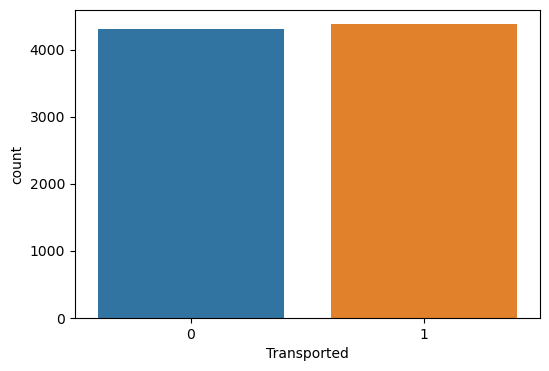

In [24]:
# Compare label 'Transported'
plt.figure(figsize=(6,4))
sns.countplot(data = train, x = 'Transported')
plt.show()

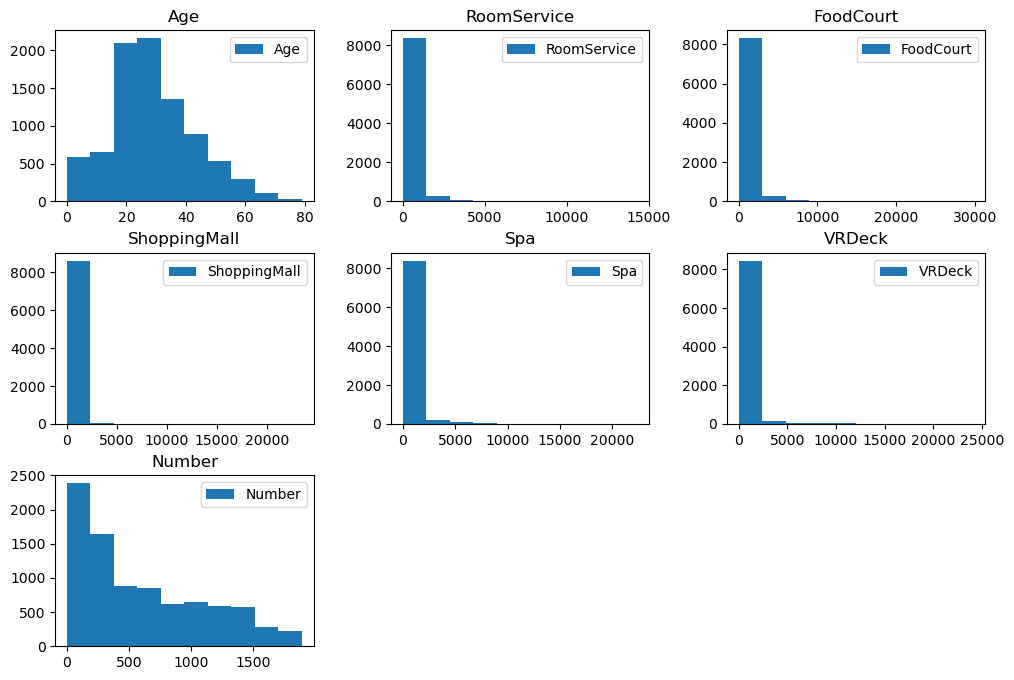

In [25]:
train.hist(figsize=(12,8), grid=False, legend=True, column = numerical_columns)
plt.show()

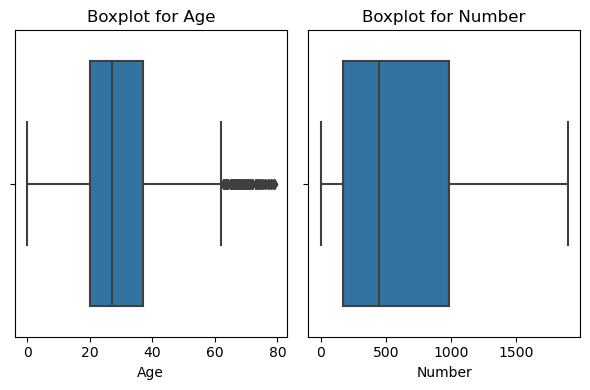

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(6,4))
ax1, ax2 = axes.flatten()
sns.boxplot(data= train, x = 'Age', ax = ax1)
ax1.set_title('Boxplot for Age')
sns.boxplot(data= train, x = 'Number', ax = ax2)
ax2.set_title('Boxplot for Number')
plt.tight_layout()
plt.show()

## Data transformation

In [27]:
print(categorical_columns)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Deck', 'Size']


### Change to numerical

In [28]:
train['HomePlanet'] = train['HomePlanet'].map({'Europa': 0, 'Earth' : 1, 'Mars': 2})
train['Destination'] = train['Destination'].map({'TRAPPIST-1e': 0, 'PSO J318.5-22' : 1, '55 Cancri e': 2})
train['Size'] = train['Size'].map({'P': 0, 'S' : 1})

test['HomePlanet'] = test['HomePlanet'].map({'Europa': 0, 'Earth' : 1, 'Mars': 2})
test['Destination'] = test['Destination'].map({'TRAPPIST-1e': 0, 'PSO J318.5-22' : 1, '55 Cancri e': 2})
test['Size'] = test['Size'].map({'P': 0, 'S' : 1})

In [29]:
train[['CryoSleep','VIP']] = train[['CryoSleep','VIP']].astype('int')

test[['CryoSleep','VIP']] = test[['CryoSleep','VIP']].astype('int')

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
train['Deck'] = le.fit_transform(train['Deck'])
test['Deck'] = le.transform(test['Deck'])

In [32]:
train.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Size
0,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1
2,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1
3,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1
4,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1


In [33]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Number,Size
0,0013_01,1,1,0,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3,1
1,0018_01,1,0,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4,1
2,0019_01,0,1,2,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1
3,0021_01,0,0,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0023_01,1,0,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5,1


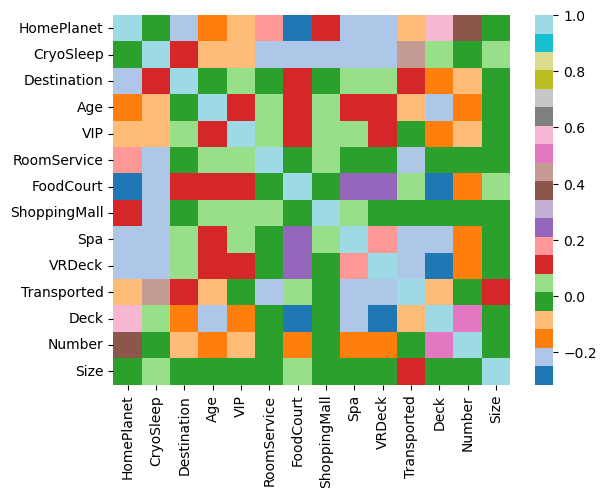

In [34]:
corr = train.corr()
sns.heatmap(corr,cmap = 'tab20')
plt.show()

In [35]:
X = train.drop('Transported', axis = 1)
y = train['Transported'].values

X_test = test.drop('PassengerId', axis = 1)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=42)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Model Prediction

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [40]:
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('XGBoost',xgb.XGBRFClassifier()),
    ('Light GBM', lgb.LGBMClassifier()),
]
results = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results.append({"Model": model_name, "Accuracy": accuracy})
models_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

In [41]:
models_df.head()

,Model,Accuracy
4,Light GBM,0.804508
2,SVM,0.788868
3,XGBoost,0.787029
1,Logistic Regression,0.769549
0,Decision Tree,0.747470


In [42]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [43]:
result_df = pd.DataFrame({
    'PassengerId': test['PassengerId'].values,
    'Transported': y_pred.astype('bool'),
})
result_df.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [44]:
result_df.to_csv('./dataset/submission.csv', index= False)